# [Data Train] Competição ML #2 - SECITEC 2020 IFG
## CRISP-DM: Evaluation
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Nesse notebook é realizada a **avaliação** do modelo preditivo, onde os dados de validação são utilizados para verificar a capacidade preditiva. Essa é a quinta fase da metodologia CRISP-DM, o evaluation. 

<img src="imgs/evaluation.jpg" />

### Carregar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [2]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 8, 4

### Carregar dataset de validação

In [3]:
dataset = pd.read_csv('datasets/teste_split.csv')
dataset.head()

,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5,obito
0,24.0,uniao,7mais,43.0,cesareo,2630.0,nao,m,9.0,10.0,0
1,19.0,uniao,7mais,39.0,cesareo,3510.0,nao,f,9.0,10.0,0
2,18.0,casada,7mais,42.0,vaginal,2915.0,nao,m,9.0,9.0,0
3,26.0,casada,7mais,38.0,cesareo,3025.0,sim,f,2.0,4.0,1
4,15.0,uniao,de4a6,NaN,vaginal,608.0,nao,m,3.0,6.0,1


### Carregar modelo preditivo

Nesse momento o modelo preditivo já foi treinado, com os dados de treino.

In [4]:
model = joblib.load('models/model.pkl')

### Preparar os dados de validação

In [5]:
# Imputar a moda em todas as variáveis
for col in dataset.columns:
    dataset.loc[dataset[col].isnull(), col] = (dataset.mode())[col][0]

In [6]:
dataset = pd.get_dummies(dataset)
# Evitar dummy trap excluindo valores de referência
dataset.drop(['estadocivilmae_solteira', 'catprenatal_7mais', 'tipoparto_cesareo', 'malformacao_nao', 'sexo_m'], axis=1, inplace=True)

In [7]:
dataset.head()

,idademae,qtdsemanas,peso,apgar1,apgar5,obito,estadocivilmae_casada,estadocivilmae_separada,estadocivilmae_uniao,estadocivilmae_viuva,catprenatal_de1a3,catprenatal_de4a6,catprenatal_nenhuma,tipoparto_vaginal,malformacao_sim,sexo_f
0,24.0,43.0,2630.0,9.0,10.0,0,0,0,1,0,0,0,0,0,0,0
1,19.0,39.0,3510.0,9.0,10.0,0,0,0,1,0,0,0,0,0,0,1
2,18.0,42.0,2915.0,9.0,9.0,0,1,0,0,0,0,0,0,1,0,0
3,26.0,38.0,3025.0,2.0,4.0,1,1,0,0,0,0,0,0,0,1,1
4,15.0,39.0,608.0,3.0,6.0,1,0,0,1,0,0,1,0,1,0,0


### Separar atributos e classe 

In [8]:
X = dataset.drop(['obito'], axis=1)
y = dataset['obito']

### Realizar predição para conjunto de validação

In [9]:
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

### Gerar matriz de confusão

Text(0.5, 15.0, 'Predicted label')

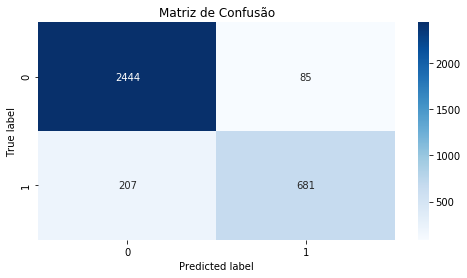

In [10]:
cm = confusion_matrix(y, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Calcular métricas de classificação

In [11]:
accuracy_score(y, y_pred)

0.9145449224465906

In [12]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2529
           1       0.89      0.77      0.82       888

    accuracy                           0.91      3417
   macro avg       0.91      0.87      0.88      3417
weighted avg       0.91      0.91      0.91      3417



### Gerar curva ROC

In [13]:
fp, tp, thresholds = roc_curve(y, y_proba[:, 1])

Text(0.5, 1.0, 'Curva ROC')

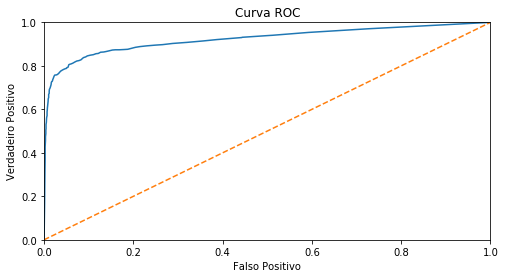

In [14]:
plt.plot(fp, tp)

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

In [15]:
# Área sob a curva ROC
auc(fp, tp)

0.9227082954840962